In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
folder = 'figures/001_modality_calculation_bayesian'
! mkdir $folder

/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/obotvinnik/workspace-git/flotilla/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2017-01-05 12:42:21	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_supplementary_post_splicing_filtering/datapackage.json
2017-01-05 12:42:21	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2017-01-05 12:42:47 	Initializing Study
2017-01-05 12:42:47 	Initializing Predictor configuration manager for Study
2017-01-05 12:42:47	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-05 12:42:47	Added ExtraTreesClassifier to default predictors
2017-01-05 12:42:47	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-05 12:42:47	Added ExtraTreesRegressor to default predictors
2017-01-05 12:42:47	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-05 12:42:47	Added Grad

Error loading species hg19 data: HTTP Error 404: Not Found

In [31]:
figure_folder = 'figures/003_modality_calculation_rmdup'
! mkdir -p $figure_folder

In [4]:
outrigger_rmdup_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/outrigger_v2_rmdup'

psi_rmdup = pd.read_csv('{}/psi/outrigger_psi.csv'.format(outrigger_rmdup_folder), index_col=0)
print(psi_rmdup.shape)
psi_rmdup.head()

(26453, 299)


,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_07_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_09_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,...,P8_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_07_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_09_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_11_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_12_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P9_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam,P9_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam,P9_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P9_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
sample_ids = psi_rmdup.columns.map(lambda x: '_'.join(x.split('_')[:2]))
sample_ids

array(['CVN_01', 'CVN_02', 'CVN_03', 'CVN_04', 'CVN_05', 'CVN_06',
       'CVN_07', 'CVN_08', 'CVN_09', 'CVN_10', 'CVN_11', 'CVN_12',
       'CVN_13', 'CVN_14', 'CVN_15', 'CVN_16', 'CVN_17', 'CVN_18',
       'CVN_19', 'CVN_20', 'CVN_21', 'CVN_22', 'CVN_23', 'CVN_24',
       'CVN_25', 'CVN_26', 'CVN_27', 'CVN_28', 'CVN_29', 'CVN_30',
       'CVN_31', 'CVN_32', 'CVN_33', 'CVN_34', 'CVN_35', 'M1_01', 'M1_02',
       'M1_03', 'M1_04', 'M1_05', 'M1_06', 'M1_07', 'M1_08', 'M1_09',
       'M1_10', 'M1_11', 'M1_12', 'M2_01', 'M2_02', 'M2_03', 'M2_04',
       'M2_05', 'M2_06', 'M2_07', 'M2_08', 'M2_09', 'M2_10', 'M2_11',
       'M2_12', 'M2nd_01', 'M2nd_02', 'M2nd_03', 'M2nd_04', 'M2nd_05',
       'M2nd_06', 'M2nd_07', 'M2nd_08', 'M2nd_09', 'M2nd_10', 'M2nd_11',
       'M2nd_12', 'M2nd_13', 'M2nd_14', 'M2nd_15', 'M2nd_16', 'M2nd_17',
       'M2nd_18', 'M2nd_19', 'M2nd_20', 'M2nd_21', 'M2nd_22', 'M2nd_23',
       'M2nd_24', 'M2nd_25', 'M2nd_26', 'M2nd_27', 'M2nd_28', 'M2nd_29',
       'M2nd_30',

In [6]:
psi_rmdup.columns = sample_ids

In [8]:
psi = psi_rmdup[not_outliers].T
print(psi.shape)
psi.head()

(181, 26453)


event_id,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,isoform1=junction:chr10:101191023-101193302:+|isoform2=junction:chr10:101191023-101191686:+@novel_exon:chr10:101191687-101191705:+@junction:chr10:101191706-101193302:+,isoform1=junction:chr10:101419346-101421202:+|isoform2=junction:chr10:101419346-101419618:+@exon:chr10:101419619-101419721:+@junction:chr10:101419722-101421202:+,isoform1=junction:chr10:101421386-101439481:+|isoform2=junction:chr10:101421386-101439017:+@exon:chr10:101439018-101439223:+@junction:chr10:101439224-101439481:+,isoform1=junction:chr10:101476219-101480743:-|isoform2=junction:chr10:101478258-101480743:-@exon:chr10:101478103-101478257:-@junction:chr10:101476219-101478102:-,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,...,isoform1=junction:chrY:21039092-21094628:-@exon:chrY:21038954-21039091:-@junction:chrY:21034721-21038953:-|isoform2=junction:chrY:21089060-21094628:-@novel_exon:chrY:21088962-21089059:-@junction:chrY:21034721-21088961:-,isoform1=junction:chrY:21094728-21206547:-@novel_exon:chrY:21094629-21094727:-@junction:chrY:21039092-21094628:-|isoform2=junction:chrY:21205233-21206547:-@exon:chrY:21205049-21205232:-@junction:chrY:21039092-21205048:-,isoform1=junction:chrY:21207178-21237826:-@exon:chrY:21207128-21207177:-@junction:chrY:21206582-21207127:-|isoform2=junction:chrY:21230685-21237826:-@exon:chrY:21230610-21230684:-@junction:chrY:21206582-21230609:-,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21750255:+@exon:chrY:21750256-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:21749394-21753665:+@exon:chrY:21753666-21753845:+@junction:chrY:21753846-21755284:+|isoform2=junction:chrY:21749394-21751406:+@exon:chrY:21751407-21751498:+@junction:chrY:21751499-21755284:+,isoform1=junction:chrY:2709669-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2713686:+|isoform2=junction:chrY:2709669-2710205:+@exon:chrY:2710206-2710283:+@junction:chrY:2710284-2713686:+,isoform1=junction:chrY:2710284-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2722640:+|isoform2=junction:chrY:2710284-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2722640:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2733128:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2733128:+,isoform1=junction:chrY:2712299-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+|isoform2=junction:chrY:2712299-2713686:+@exon:chrY:2713687-2713784:+@junction:chrY:2713785-2734833:+,isoform1=junction:chrY:2713785-2733128:+@exon:chrY:2733129-2733286:+@junction:chrY:2733287-2734833:+|isoform2=junction:chrY:2713785-2722640:+@exon:chrY:2722641-2722812:+@junction:chrY:2722813-2734833:+
CVN_01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_03,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Use only alternative exons - not all 1 or all 0 in all cell types

In [9]:
notnull = psi.notnull()

constitutively0 = (psi == 0)[notnull].all()

constitutively1 = (psi == 1)[notnull].all()
alternative = psi.columns[~constitutively0 & ~constitutively1]
print('len(alternative)', len(alternative))


constitutively0 = constitutively0[constitutively0].index
constitutively1 = constitutively1[constitutively1].index

print('len(constitutively0)', len(constitutively0))
print('len(constitutively1)', len(constitutively1))

constitutive = constitutively0 | constitutively1
print('len(constitutive)', len(constitutive))

('len(alternative)', 11910)
('len(constitutively0)', 9789)
('len(constitutively1)', 9406)
('len(constitutive)', 14543)


In [13]:
psi_alternative = psi[alternative]
psi_alternative.shape

(181, 11910)

## Estimate modalities

### Initialize the modality estimator

In [10]:
import anchor

bayesian = anchor.BayesianModalities()

## Calculate/Estimate modalities only on single cells, with no outliers

And at least 10 cells per splicing event, per celltype/phenotype

In [11]:
study.splicing.minimum_samples

10

In [14]:
print(psi_alternative.shape)
psi_alternative = psi_alternative.groupby(
    study.sample_id_to_phenotype).apply(lambda x: x.dropna(thresh=study.splicing.minimum_samples, axis=1))
print(psi_alternative.shape)

(181, 11910)
(181, 4866)


In [15]:
%time modality_assignments = psi_alternative.groupby(study.sample_id_to_phenotype).apply(bayesian.fit_predict)

CPU times: user 11min 22s, sys: 209 ms, total: 11min 22s
Wall time: 11min 22s


In [17]:
modality_assignments

,isoform1=junction:chr10:101507148-101514285:+|isoform2=junction:chr10:101507148-101510125:+@exon:chr10:101510126-101510153:+@junction:chr10:101510154-101514285:+,isoform1=junction:chr10:102013297-102019974:-|isoform2=junction:chr10:102016234-102019974:-@exon:chr10:102016019-102016233:-@junction:chr10:102013297-102016018:-,isoform1=junction:chr10:102016234-102020722:-|isoform2=junction:chr10:102020077-102020722:-@exon:chr10:102019975-102020076:-@junction:chr10:102016234-102019974:-,isoform1=junction:chr10:102114390-102120490:+|isoform2=junction:chr10:102114390-102116288:+@exon:chr10:102116289-102116521:+@junction:chr10:102116522-102120490:+,isoform1=junction:chr10:102746733-102747069:-|isoform2=junction:chr10:102746954-102747069:-@exon:chr10:102746847-102746953:-@junction:chr10:102746733-102746846:-,isoform1=junction:chr10:103113986-103190101:+|isoform2=junction:chr10:103113986-103167197:+@novel_exon:chr10:103167198-103167290:+@junction:chr10:103167291-103190101:+,isoform1=junction:chr10:103348158-103360494:+|isoform2=junction:chr10:103348158-103354414:+@exon:chr10:103354415-103354495:+@junction:chr10:103354496-103360494:+,isoform1=junction:chr10:103361094-103368591:+|isoform2=junction:chr10:103361094-103364896:+@exon:chr10:103364897-103364969:+@junction:chr10:103364970-103368591:+,isoform1=junction:chr10:103361094-103369123:+|isoform2=junction:chr10:103361094-103368591:+@exon:chr10:103368592-103368694:+@junction:chr10:103368695-103369123:+,isoform1=junction:chr10:1034468-1041868:+|isoform2=junction:chr10:1034468-1038428:+@exon:chr10:1038429-1038599:+@junction:chr10:1038600-1041868:+,...,isoform1=junction:chrX:85233896-85282494:-|isoform2=junction:chrX:85236814-85282494:-@exon:chrX:85236741-85236813:-@junction:chrX:85233896-85236740:-,isoform1=junction:chrX:85236814-85302487:-|isoform2=junction:chrX:85282562-85302487:-@exon:chrX:85282495-85282561:-@junction:chrX:85236814-85282494:-,isoform1=junction:chrX:9693881-9707524:-|isoform2=junction:chrX:9694017-9707524:-@novel_exon:chrX:9693988-9694016:-@junction:chrX:9693881-9693987:-,isoform1=junction:chrX:99884984-99887481:-|isoform2=junction:chrX:99885864-99887481:-@exon:chrX:99885756-99885863:-@junction:chrX:99884984-99885755:-,isoform1=junction:chrX:99887566-99888927:-|isoform2=junction:chrX:99888537-99888927:-@exon:chrX:99888402-99888536:-@junction:chrX:99887566-99888401:-,isoform1=junction:chrX:99890744-99891604:-|isoform2=junction:chrX:99891205-99891604:-@novel_exon:chrX:99891188-99891204:-@junction:chrX:99890744-99891187:-,isoform1=junction:chrY:15026562-15026978:+|isoform2=junction:chrY:15026562-15026795:+@exon:chrY:15026796-15026894:+@junction:chrY:15026895-15026978:+,isoform1=junction:chrY:15028547-15029314:+|isoform2=junction:chrY:15028547-15028818:+@exon:chrY:15028819-15028972:+@junction:chrY:15028973-15029314:+,isoform1=junction:chrY:2709669-2712117:+|isoform2=junction:chrY:2709669-2710205:+@exon:chrY:2710206-2710283:+@junction:chrY:2710284-2712117:+,isoform1=junction:chrY:2710284-2713686:+|isoform2=junction:chrY:2710284-2712117:+@exon:chrY:2712118-2712298:+@junction:chrY:2712299-2713686:+
phenotype,,,,,,,,,,,,,,,,,,,,,
MN,NaN,NaN,NaN,included,bimodal,bimodal,included,excluded,NaN,included,...,NaN,NaN,NaN,NaN,included,excluded,NaN,NaN,included,included
NPC,NaN,NaN,NaN,included,bimodal,NaN,included,excluded,bimodal,included,...,NaN,NaN,NaN,bimodal,included,excluded,NaN,NaN,included,included
iPSC,bimodal,included,bimodal,included,included,NaN,included,excluded,included,included,...,included,included,bimodal,NaN,included,excluded,included,included,included,included


In [18]:
modalities_tidy = modality_assignments.stack().reset_index()
modalities_tidy = modalities_tidy.rename(columns={'level_1': 'event_id', 0: "modality",})
modalities_tidy.head()

,phenotype,event_id,modality
0,MN,isoform1=junction:chr10:102114390-102120490:+|...,included
1,MN,isoform1=junction:chr10:102746733-102747069:-|...,bimodal
2,MN,isoform1=junction:chr10:103113986-103190101:+|...,bimodal
3,MN,isoform1=junction:chr10:103348158-103360494:+|...,included
4,MN,isoform1=junction:chr10:103361094-103368591:+|...,excluded


In [26]:
# modalities_tidy.loc[modalities_tidy.event_id.isin(pkm_events)]

In [27]:
modalities_counts = modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,450
1,MN,excluded,890
2,MN,included,735
3,MN,uncategorized,1
4,NPC,bimodal,735


In [28]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

In [29]:
modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,1624.0,1254.0,890.0
bimodal,1189.0,735.0,450.0
included,1585.0,1043.0,735.0
middle,NaN,NaN,NaN
uncategorized,36.0,4.0,1.0


In [44]:
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


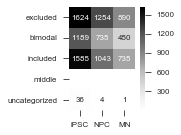

In [50]:
fig, ax= plt.subplots(figsize=(2.5, 2))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=8), cmap='Greys')
ax.set(xlabel='', ylabel='')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(figure_folder))

In [46]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,450,21.676301
1,MN,excluded,890,42.870906
2,MN,included,735,35.404624
3,MN,uncategorized,1,0.048170
4,NPC,bimodal,735,24.209486
5,NPC,excluded,1254,41.304348
6,NPC,included,1043,34.354414
7,NPC,uncategorized,4,0.131752
8,iPSC,bimodal,1189,26.815516
9,iPSC,excluded,1624,36.626071


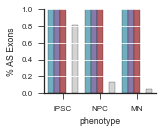

In [47]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order, zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=5)
ax.set(ylabel='% AS Exons', ylim=(0, 50))
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot.pdf'.format(figure_folder))

ax.set(ylim=(0, 1))
# ax.grid(axis='y', color='grey', zorder=np.inf)
fig.savefig('{}/modalities_barplot_zoom.pdf'.format(figure_folder))

In [35]:
study.supplemental.modalities_tidy = modalities_tidy

In [36]:
modalities_tidy.groupby(['phenotype', 'modality']).size()

phenotype  modality     
MN         bimodal           450
           excluded          890
           included          735
           uncategorized       1
NPC        bimodal           735
           excluded         1254
           included         1043
           uncategorized       4
iPSC       bimodal          1189
           excluded         1624
           included         1585
           uncategorized      36
dtype: int64

In [37]:
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study.save('singlecell_pnm_figure2_modalities_rmdup', flotilla_dir=flotilla_dir)

Wrote datapackage to /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_rmdup/datapackage.json
